# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras
import keras.backend as K

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

from sofenn.FuzzyNetwork import FuzzyNetwork
#from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Read in and prep Iris Dataset

In [2]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [3]:
fuzz = FuzzyNetwork(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=5, max_neurons=100,                 # initialization parameters
            ifpart_thresh=0.1354, err_delta=0.12        # evaluation and ifpart threshold
            )

Building Fuzzy Network with 5 neurons...
Instructions for updating:
Colocations handled automatically by placer.
...Model successfully built!


In [4]:
fuzz.compile_model()

Compiling model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 5)            40          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 5)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 5)            25          Inputs[0][0]                     
                                                                 Normalization[0][0]      

In [8]:
fuzz.train_model(epochs=150)

Training model...
Epoch 1/150
135/135 [==============================] - 0s 148us/step - loss: 0.7817 - binary_accuracy: 0.9901
Epoch 2/150
135/135 [==============================] - 0s 167us/step - loss: 0.8383 - binary_accuracy: 0.9901
Epoch 3/150
135/135 [==============================] - 0s 173us/step - loss: 0.7025 - binary_accuracy: 0.9901
Epoch 4/150
135/135 [==============================] - 0s 143us/step - loss: 0.8074 - binary_accuracy: 0.9901
Epoch 5/150
135/135 [==============================] - 0s 204us/step - loss: 0.7890 - binary_accuracy: 0.9901
Epoch 6/150
135/135 [==============================] - 0s 191us/step - loss: 0.8205 - binary_accuracy: 0.9901
Epoch 7/150
135/135 [==============================] - 0s 182us/step - loss: 0.8212 - binary_accuracy: 0.9901
Epoch 8/150
135/135 [==============================] - 0s 147us/step - loss: 0.8175 - binary_accuracy: 0.9901
Epoch 9/150
135/135 [==============================] - 0s 210us/step - loss: 0.6911 - binary_accuracy:

135/135 [==============================] - 0s 134us/step - loss: 0.6890 - binary_accuracy: 0.9901
Epoch 75/150
135/135 [==============================] - 0s 125us/step - loss: 0.6348 - binary_accuracy: 0.9901
Epoch 76/150
135/135 [==============================] - 0s 127us/step - loss: 0.6753 - binary_accuracy: 0.9901
Epoch 77/150
135/135 [==============================] - 0s 124us/step - loss: 0.6512 - binary_accuracy: 0.9901
Epoch 78/150
135/135 [==============================] - 0s 126us/step - loss: 0.7020 - binary_accuracy: 0.9901
Epoch 79/150
135/135 [==============================] - 0s 139us/step - loss: 0.7059 - binary_accuracy: 0.9901
Epoch 80/150
135/135 [==============================] - 0s 138us/step - loss: 0.6945 - binary_accuracy: 0.9901
Epoch 81/150
135/135 [==============================] - 0s 158us/step - loss: 0.6959 - binary_accuracy: 0.9901
Epoch 82/150
135/135 [==============================] - 0s 147us/step - loss: 0.6405 - binary_accuracy: 0.9901
Epoch 83/150
1

135/135 [==============================] - 0s 160us/step - loss: 0.6212 - binary_accuracy: 0.9901
Epoch 148/150
135/135 [==============================] - 0s 136us/step - loss: 0.6123 - binary_accuracy: 0.9901
Epoch 149/150
135/135 [==============================] - 0s 139us/step - loss: 0.5902 - binary_accuracy: 0.9901
Epoch 150/150
135/135 [==============================] - 0s 129us/step - loss: 0.6202 - binary_accuracy: 0.9901


In [9]:
fuzz.get_layer_weights('FuzzyRules')

[array([[ 7.643415  ,  4.472463  ,  5.3086367 ,  5.3346767 ,  5.782993  ],
        [ 1.933244  ,  1.2550277 ,  3.9208655 ,  1.5429715 ,  3.938199  ],
        [ 7.7084208 ,  4.8704805 ,  0.9530461 ,  5.718742  ,  1.1471996 ],
        [ 3.5400114 ,  2.3435256 , -0.52213347,  3.1437383 , -0.50069433]],
       dtype=float32),
 array([[4.3598747, 1.6495532, 4.4274707, 3.6760364, 4.2651973],
        [2.9385262, 1.8006812, 3.3987815, 2.0799227, 3.4363613],
        [3.0985408, 2.9609013, 3.4548428, 3.3004444, 3.4404006],
        [2.3039403, 2.5767376, 2.6903005, 2.3224108, 2.7011006]],
       dtype=float32)]

In [10]:
X_test

array([[6. , 3. , 4.8, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [4.4, 3.2, 1.3, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [6.1, 2.6, 5.6, 1.4],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.3, 1.7, 0.5],
       [5.8, 2.8, 5.1, 2.4],
       [4.9, 3.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 3.4, 5.6, 2.4],
       [6.7, 3. , 5. , 1.7],
       [6.4, 3.2, 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4]])

In [11]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [13]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [14]:
acc.sum() / acc.size

1.0

## Model Prediction Results

In [15]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 10ms/step
Model Loss: 0.65088928
Binary Accuracy: 100.0%


In [16]:
fuzz.model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


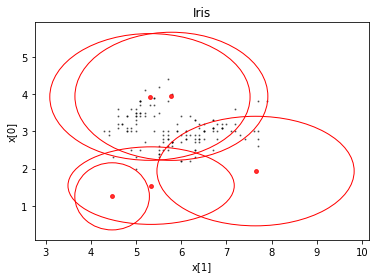

In [18]:
w = fuzz.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()